## Conditional Graph
- Implement conditional logi to route the flow of data to different nodes
- Create router node to handle decision making and control graph

In [8]:
from typing import TypedDict
from langgraph.graph import StateGraph, START,END

In [ ]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2:int
    finalNumber:int

In [10]:
def adder(state:AgentState) -> AgentState:
    """This node adds the 2 numbers"""
    state["finalNumber"] = state["number1"] + state["number2"]
    return state

def subtractor(state:AgentState) -> AgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber"] = state["number1"] - state["number2"]
    return state

def decide_next_node(state:AgentState) -> AgentState:
    """This node will select the next node of the graph"""
    if state["operation"] == "+":
        return "addition_operation" #edge
    
    elif state["operation"] == "-":
        return "subtraction_operation" #edge

In [11]:
graph = StateGraph(AgentState)

graph.add_node("add_node",adder)
graph.add_node("subtract_node",subtractor)
graph.add_node("router",lambda state:state) #pass the same node (on the top) to the adder/subtractor

graph.add_edge(START,"router")

graph.add_conditional_edges(
    source="router",#The starting node. This conditional edge will run when exiting this node.
    path=decide_next_node, #The callable that determines the next node or nodes. If not specifying path_map it should return one or more nodes. If it returns END, the graph will stop execution.
    path_map={ #Optional mapping of paths to node names. If omitted the paths returned by path should be node names.
        # Edge: Node
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }
)
graph.add_edge("add_node",END)
graph.add_edge("subtract_node",END)

app = graph.compile()

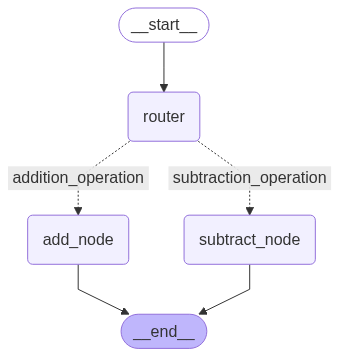

In [12]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
initial_state_1 = AgentState(number1=10,operation="-",number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalNumber': 5}


In [22]:
class newAgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    finalNumber1:int
    number3: int
    operation2: str
    number4: int
    finalNumber2:int

In [23]:
def adder1(state:newAgentState) -> newAgentState:
    """This node adds the 2 numbers"""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def subtractor1(state:newAgentState) -> newAgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber1"] = state["number1"] - state["number2"]
    return state

def decide_next_node1(state:newAgentState) -> newAgentState:
    """This node will select the next node of the graph"""
    if state["operation1"] == "+":
        return "addition_operation1" #edge
    
    elif state["operation1"] == "-":
        return "subtraction_operation1" #edge

def adder2(state:newAgentState) -> newAgentState:
    """This node adds the 2 numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def subtractor2(state:newAgentState) -> newAgentState:
    """This node subtracts the 2 numbers"""
    state["finalNumber2"] = state["number3"] - state["number4"]
    return state

def decide_next_node2(state:newAgentState) -> newAgentState:
    """This node will select the next node of the graph"""
    if state["operation2"] == "+":
        return "addition_operation2" #edge
    
    elif state["operation2"] == "-":
        return "subtraction_operation2" #edge

In [24]:
new_graph = StateGraph(newAgentState)
new_graph.add_node('add_node1',adder1)
new_graph.add_node('subtract_node1',subtractor1)
new_graph.add_node('router1',lambda state:state)
new_graph.add_node('add_node2',adder2)
new_graph.add_node('subtract_node2',subtractor2)
new_graph.add_node('router2',lambda state:state)

new_graph.add_edge(START,'router1')
new_graph.add_conditional_edges(
    'router1',
    decide_next_node1,
    {
        "addition_operation1":"add_node1",
        "subtraction_operation1":"subtract_node1"
    }
)
new_graph.add_edge("add_node1","router2")
new_graph.add_edge("subtract_node1","router2")
new_graph.add_conditional_edges(
    "router2",
    decide_next_node2,
    {
        "addition_operation2":"add_node2",
        "subtraction_operation2":"subtract_node2"
    }
)
new_graph.add_edge("add_node2",END)
new_graph.add_edge("subtract_node2",END)

app = new_graph.compile()


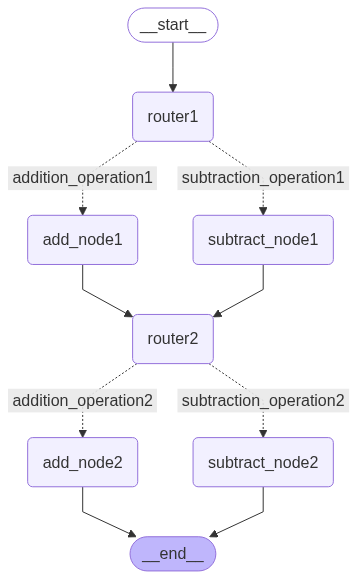

In [25]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
initial_state = newAgentState(number1=1,number2=2,operation1="+",number3=10,number4=2,operation2="-")
print(app.invoke(initial_state))

{'number1': 1, 'operation1': '+', 'number2': 2, 'finalNumber1': 3, 'number3': 10, 'operation2': '-', 'number4': 2, 'finalNumber2': 8}
